In [45]:
# ex1 a)

from HW2_util import TwoLayerLinearClassificationNN as TwoLayerNN

training_data_x_ex1a = [[1,0],
                        [-1,0],
                        [0,1],
                        [0,-1]]
training_data_y_ex1a = [1,1,2,2]

ex1a_model = TwoLayerNN(training_data_x_ex1a, training_data_y_ex1a)

# have to run multiple times
ex1a_model.find_good_parameters(5000, num_of_good_models=4)
# ex1a_model.plot_loss_accuracy(num_epoch=5000, learning_rate=0.05)


524 trainings, model accuracy is 1.0
('0.weight', Parameter containing:
tensor([[-0.5508,  0.0877],
        [-1.0719,  0.0030]], requires_grad=True))
('0.bias', Parameter containing:
tensor([ 0.5459, -0.0033], requires_grad=True))
('2.weight', Parameter containing:
tensor([[-0.4938,  0.9259],
        [ 0.4283, -0.7880]], requires_grad=True))
('2.bias', Parameter containing:
tensor([0.4955, 0.4940], requires_grad=True))
The loss is 0.09703904390335083

525 trainings, model accuracy is 1.0
('0.weight', Parameter containing:
tensor([[-0.5498,  0.0868],
        [-1.0738,  0.0030]], requires_grad=True))
('0.bias', Parameter containing:
tensor([ 0.5506, -0.0015], requires_grad=True))
('2.weight', Parameter containing:
tensor([[-0.4960,  0.9266],
        [ 0.4302, -0.7897]], requires_grad=True))
('2.bias', Parameter containing:
tensor([0.4969, 0.4931], requires_grad=True))
The loss is 0.09666939079761505

526 trainings, model accuracy is 1.0
('0.weight', Parameter containing:
tensor([[-0.554

In [7]:
# import pandas as pd
# import numpy as np
# # ex1 b)
# 
# df = pd.read_csv('./data/data_HW2_ex1.csv')
# X = np.column_stack((df['x1'].values, df['x2'].values))
# y = df['class'].values
# 
# ex1b_model = TwoLayerNN(X, y)
# # ex1b_model.train_model_and_print(500)
# # print(ex1b_model.measure_accuracy_in_training_data())
# ex1b_model.find_good_parameters(500, num_of_good_models=4)


339 trainings, model accuracy is 0.905
('0.weight', Parameter containing:
tensor([[-0.0434,  0.7717],
        [ 0.1653, -0.4419]], requires_grad=True))
('0.bias', Parameter containing:
tensor([-0.1512,  0.2146], requires_grad=True))
('2.weight', Parameter containing:
tensor([[-0.3553, -0.2813],
        [ 0.7624,  0.3256]], requires_grad=True))
('2.bias', Parameter containing:
tensor([0.6327, 0.2790], requires_grad=True))
The loss is 0.17311884462833405

340 trainings, model accuracy is 0.905
('0.weight', Parameter containing:
tensor([[-0.0435,  0.7733],
        [ 0.1645, -0.4456]], requires_grad=True))
('0.bias', Parameter containing:
tensor([-0.1514,  0.2132], requires_grad=True))
('2.weight', Parameter containing:
tensor([[-0.3576, -0.2828],
        [ 0.7630,  0.3279]], requires_grad=True))
('2.bias', Parameter containing:
tensor([0.6336, 0.2780], requires_grad=True))
The loss is 0.17244598269462585

341 trainings, model accuracy is 0.91
('0.weight', Parameter containing:
tensor([[-

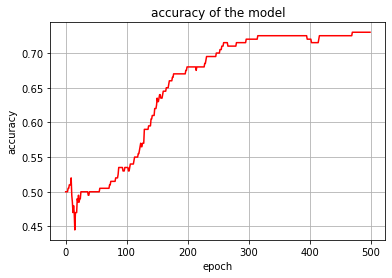

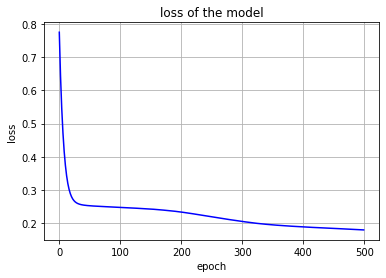

In [48]:
import pandas as pd
import numpy as np
from HW2_util import TwoLayerLinearClassificationNN as TwoLayerNN

df = pd.read_csv('./data/data_HW2_ex1.csv')
X = np.column_stack((df['x1'].values, df['x2'].values))
y = df['class'].values

ex1b_model = TwoLayerNN(X, y)
ex1b_model.plot_loss_accuracy(num_epoch=500, learning_rate=0.05)